# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [3]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [4]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [5]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [6]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [7]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [8]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [9]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [10]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [11]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [12]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [13]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [14]:
gss['madeg'].value_counts().sort_index()

0    23073
1    24169
2     1770
3     3895
4     1544
7     3955
8     3374
9      686
Name: madeg, dtype: int64

In [15]:
gss['madeg'].describe()

count    62466.000000
mean         1.703663
std          2.450174
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: madeg, dtype: float64

In [16]:
gss['padeg'].value_counts().sort_index()

0    22479
1    16733
2      895
3     4134
4     2744
7    11094
8     3794
9      593
Name: padeg, dtype: int64

In [17]:
gss['padeg'].describe()

count    62466.00000
mean         2.48532
std          2.96741
min          0.00000
25%          0.00000
50%          1.00000
75%          4.00000
max          9.00000
Name: padeg, dtype: float64

In [18]:
gss['partyid'].value_counts().sort_index()

0     9999
1    12942
2     7485
3     9474
4     5462
5     9661
6     6063
7      995
8       11
9      374
Name: partyid, dtype: int64

In [19]:
gss['partyid'].describe()

count    62466.000000
mean         2.774053
std          2.095865
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: partyid, dtype: float64

In [16]:
gss['polviews'].value_counts().sort_index()

0     6777
1     1560
2     6236
3     6754
4    20515
5     8407
6     7876
7     1733
8     2247
9      361
Name: polviews, dtype: int64

In [20]:
gss['polviews'].describe()

count    62466.000000
mean         3.826097
std          2.011596
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: polviews, dtype: float64

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

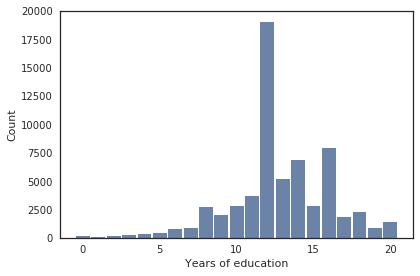

In [23]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

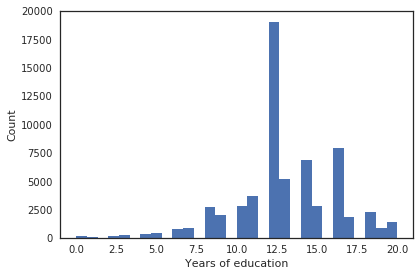

In [24]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna(), bins=30)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

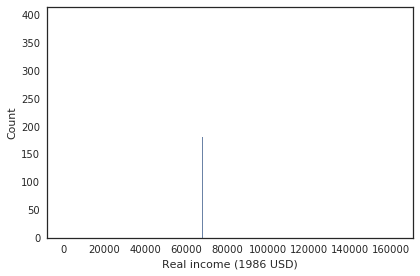

In [25]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

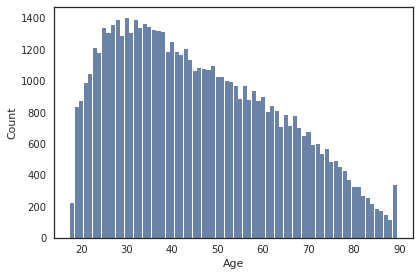

In [27]:
# Solution goes here
hist_age = Hist(gss['educ'])
thinkplot.hist(hist_age)
decorate(xlabel = 'Age',
        ylabel = 'Count')

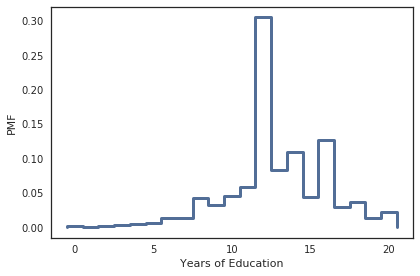

In [28]:
# Solution goes here
pmf_educ = Pmf(gss['educ'])
thinkplot.pmf(pmf_educ)
decorate(xlabel = 'Years of Education',
        ylabel = 'PMF')

In [29]:
# Solution goes here
pmf_educ[12]

0.30511141077505938

In [30]:
# Solution goes here
pmf_educ[14]

0.10991780645989853

In [31]:
# Solution goes here
pmf_educ[16]

0.12722339947344763

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

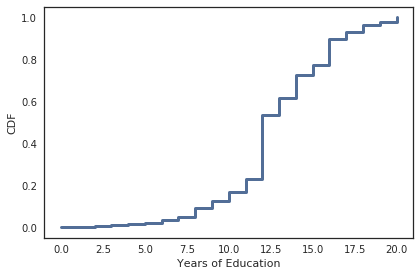

In [34]:
# Solution goes here
cdf_educ = Cdf(gss['educ'])
thinkplot.cdf(cdf_educ)
decorate(xlabel = 'Years of Education',
        ylabel = 'CDF')

In [35]:
# Solution goes here
cdf_educ.Prob(12)

0.53270082835677135

In [36]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

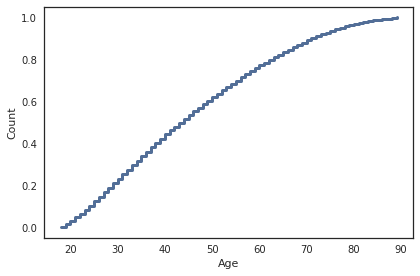

In [38]:
# Solution goes here
cdf_age = Cdf(gss['age'])
thinkplot.cdf(cdf_age)
decorate(xlabel = 'Age',
        ylabel = 'Count')

In [39]:
# Solution goes here
cdf_age.Value(.5)

44.0

In [40]:
# Solution goes here
cdf_age.Value(.75)-cdf_age.Value(.25)

28.0

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

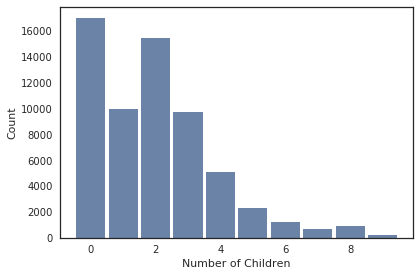

In [43]:
# Solution goes here
hist_childs = Hist(gss['childs'])
thinkplot.hist(hist_childs)
decorate(xlabel = 'Number of Children',
        ylabel = 'Count')

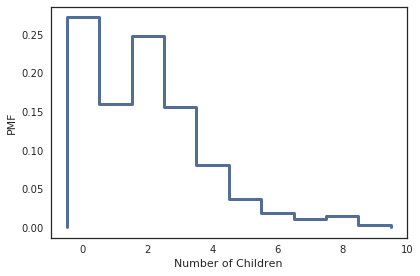

In [44]:
# Solution goes here
pmf_childs = Pmf(gss['childs'])
thinkplot.pmf(pmf_childs)
decorate(xlabel = 'Number of Children',
        ylabel = 'PMF')

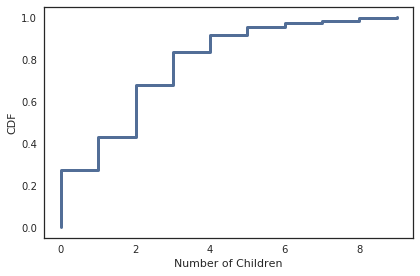

In [45]:
# Solution goes here
cdf_childs = Cdf(gss['childs'])
thinkplot.cdf(cdf_childs)
decorate(xlabel = 'Number of Children',
        ylabel = 'CDF')

In [46]:
# Solution goes here
gss['childs'].describe()

count    62466.000000
mean         1.965117
std          1.820545
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: childs, dtype: float64

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

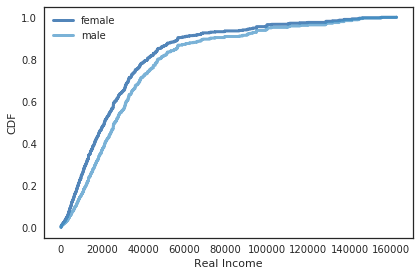

In [51]:
# Solution goes here
women = gss['sex'] == 2
men = gss['sex'] == 1
women_inc_cdf = Cdf(gss.realinc[women], label = 'female')
men_inc_cdf = Cdf(gss.realinc[men], label = 'male')
thinkplot.PrePlot(2)
thinkplot.cdfs([female_inc_cdf, male_inc_cdf])
decorate(xlabel = 'Real Income',
        ylabel = 'CDF')

In [52]:
# Solution goes here
female_inc_cdf.Value(.5)-male_inc_cdf.Value(.5)

-5185.0

In [53]:
# Solution goes here

In [54]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

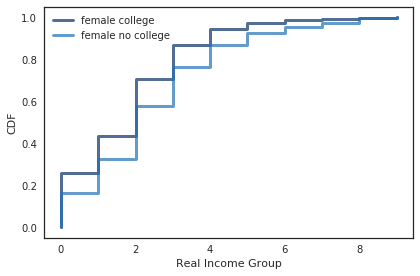

In [58]:
# Solution goes here
female = gss[gss['sex'] == 2]

some_college = female[female['educ']>=12]
some_college_cdf_childs = Cdf(some_college['childs'], label = 'female college')

no_college = female[female['educ']<=12]
no_college_cdf_childs = Cdf(no_college['childs'], label = 'female no college')

thinkplot.PrePlot(4)
thinkplot.cdfs([some_college_cdf_childs,
                no_college_cdf_childs
               ])
decorate(xlabel = 'Real Income Group',
        ylabel = 'CDF')

In [59]:
# Solution goes here

In [60]:
# Solution goes here

In [61]:
# Solution goes here

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [62]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [63]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [64]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 20.7 ms, sys: 26.2 ms, total: 46.9 ms
Wall time: 51 ms


(62466, 101)